<a href="https://colab.research.google.com/github/Jheim12/PPHA30456/blob/main/lab_06/ML_lab6_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Mini Project 3 

Click [here](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing) for Data Dictionary

Predicting bike rental count based on environmental and seasonal settings. 

Qs. What affects bike rentals?

Qs. How could we predict?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [2]:
# Helps to display all rows and columns in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Jheim12/PPHA30456/main/lab_06/bike.csv")

In [4]:
print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Season (1:   spring, 2: summer, 3: fall, 4: winter)


Year (0: 2011,   1:2012)


Weather Situation (1: Clear, Few   clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog)

Date (Format: YYYY-MM-DD)

In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# Set attribute 'instant' as index
data.set_index(['instant'], inplace = True)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Removing dteday, casual and registered columns.
# Casual + Registered = Total 

temp_df = data.copy()

data.drop(['dteday', 'casual','registered'], axis=1, inplace=True)

Qs. Why remove dteday?

In [8]:
# demo of how to extract features using datetime module 

import datetime as dt 

temp_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
temp_df['dteday'] = pd.to_datetime(temp_df['dteday'])
temp_df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
# extract datetime features from the datetime column 

# year
temp_df['year'] = temp_df['dteday'].dt.year

# month 
temp_df['month'] = temp_df['dteday'].dt.month

# day of month
temp_df['dayofmonth'] = temp_df['dteday'].dt.day

# day of year 
temp_df['dayofyear'] = temp_df['dteday'].dt.dayofyear

# day of week 
temp_df['day_of_week'] = temp_df['dteday'].dt.dayofweek

display(temp_df.head())

display(temp_df.dtypes)

# Can have hour of the day as well if we have a datetime column with time too. 


# Look into datetime module. Very useful for time series feature engineering 

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,dayofmonth,dayofyear,day_of_week
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,1,1,1,5
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,1,1,1,5
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,1,1,1,5
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,1,1,1,5
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,1,1,1,5


dteday         datetime64[ns]
season                  int64
yr                      int64
mnth                    int64
hr                      int64
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
year                    int64
month                   int64
dayofmonth              int64
dayofyear               int64
day_of_week             int64
dtype: object

In [11]:
# checking for null values 


data.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [12]:
# we're predicting the variable 'cnt' or count
X = data.copy()
y = X.pop('cnt') 

# pop will remove the last element from a list if called without any parameter. 
# It returns the value "popped"

display(X.head())
display(y.head())

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

In [13]:
# Mapping values. Look at the data dictionary
seasons = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
data["season"].replace(seasons, inplace=True)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [14]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [15]:
# Make dummies
# One-hot encoding using python's built-in get_dummies function. 


# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

X = pd.get_dummies(X, columns = ['season'])
X.head()


# drop_first = True to get k-1 variables 

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,
1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,0,0,0
2,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,1,0,0,0
3,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1,0,0,0
4,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1,0,0,0
5,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,0,0,0


In [16]:
# Summary statistics

X.describe()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,0.244088,0.253697,0.258703,0.243512
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,0.429557,0.435139,0.437935,0.429214
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,0.000000,1.000000,1.000000,0.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,1.000000,1.000000,1.000000,1.000000


In [17]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train.describe()
# set random state to 25 in the mini-project 

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,0.502338,6.528879,11.542401,0.028051,3.006833,0.683450,1.424872,0.497839,0.476469,0.627778,0.190160,0.239948,0.259009,0.256563,0.244480
std,0.500013,3.424212,6.899815,0.165126,2.005250,0.465147,0.639720,0.192032,0.171355,0.193149,0.122486,0.427067,0.438106,0.436752,0.429794
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,0.000000,1.000000,1.000000,0.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,1.000000,1.000000,1.000000,1.000000


## Modeling 

In [18]:
#5

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [19]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.4010729752022212
0.37760776527211315


In [20]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

20569.60788906484

## Lasso, Ridge 

Regularization techniques.

- reduce model complexity 
- prevent overfitting 
- add a penalty for adding too many predictors 

In [21]:
# Refer to https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html
# Optimizing lasso hyperparameter through AIC
from sklearn.linear_model import LassoLarsIC 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lasso_aic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)

results_aic = pd.DataFrame(
    {
        "alphas": lasso_aic[-1].alphas_,
        "AIC criterion": lasso_aic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_aic[-1].alpha_

def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]

results_aic.style.apply(highlight_min)



,AIC criterion
alphas,
0.5569208331244488,232713.450035
0.539848570958651,232430.872578
0.40073943568292836,228936.737023
0.3329616635358968,227213.679952
0.28411907481166065,225791.748388
0.1690308488997513,223307.003556
0.12322095512455594,222544.951358
0.039517874674299805,221548.968451
0.03516919272519807,221512.757406


In [22]:
# Optimizing lasso hyperparameter through cv
from sklearn.linear_model import LassoCV

# Estimate lasso with alpha = 0, 0.5, ..., 2 and 10 cv-folds
alphac = np.linspace(0, 2, 5)
lasso_cv = make_pipeline(StandardScaler(), LassoCV(alphas=alphac, cv=10, random_state=1)).fit(X, y)

# We will extract the outputs from the fitted models
print(lasso_cv, '\n')
lasso = lasso_cv[-1]

print(lasso.alphas_, '\n')
print(lasso.mse_path_, '\n')
print(lasso.mse_path_.mean(axis=-1), '\n')


# Display the results
results_cv = pd.DataFrame(
    {
        "alphas": lasso.alphas_,
        "MSE": lasso.mse_path_.mean(axis=-1),
    }
).set_index("alphas")
alpha_cv = lasso.alpha_

def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]

display(results_cv.style.apply(highlight_min))

print('\n', lasso.alpha_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0. , 0.5, 1. , 1.5, 2. ]), cv=10,
                         random_state=1))]) 

[2.  1.5 1.  0.5 0. ] 

[[ 7016.89085469 10888.0305281  16724.20619421 14108.96973086
  10436.86572062 15126.22592529 30741.93499417 33790.22728857
  42799.59111813 24987.42233869]
 [ 7189.74635014 10900.22290191 16689.49051304 14163.07583939
  10448.71395141 15143.1508423  30599.87406083 33729.70915597
  42687.16333402 25020.22291659]
 [ 7403.09981963 10915.94847923 16661.84395907 14227.16887736
  10462.80202166 15165.09087207 30458.6900094  33673.07276063
  42581.02500903 25066.3444939 ]
 [ 7648.78031739 10936.71933618 16640.18691939 14301.96255637
  10476.47807954 15188.00663709 30331.4640192  33621.33207119
  42480.65997847 25119.73041876]
 [ 7930.84334048 10965.83309367 16622.78606458 14424.68370561
  10570.43595841 15231.84161194 30214.80407855 33604.40186328
  42441.46875367 25185.

,MSE
alphas,
2.0,20662.036469
1.5,20657.136987
1.0,20661.508630
0.5,20674.532033
0.0,20719.291808



 1.5


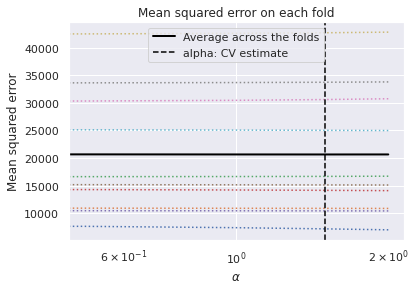

In [23]:
# Dotted lines with the MSE of each fold-alpha pair
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")

# Bold line with the average MSE of each alpha
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)

# Dashed line showing the alpha with the lowest MSE
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

# Labeling
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean squared error")
plt.legend()
_ = plt.title(
    f"Mean squared error on each fold"
)